# Diwali Analysis 

## Q1. Import the required libraries

In [1]:
import pandas as pd

## Q2.import csv file Diwali Sales Data.csv

In [4]:
file_path = r"C:\Users\shish\Desktop\Diwali Sales Data.csv"
df = pd.read_csv(file_path, encoding='unicode_escape')

## Q3. Find the shape of the data

In [5]:
df.shape


(11251, 15)

## Q4. Fetch the first five rows of the dataset

In [6]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Q5. Get the complete info of the dataset

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Q6. Drop unrelated/blank columns 'Status' and 'unnamed1'

In [12]:
df.drop(columns=['Status', 'unnamed1'], errors='ignore', inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## Q7. Check for null values and find which columns have null values

In [13]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]

print("Columns with null values:\n")
print(null_columns)


Columns with null values:

Amount    12
dtype: int64


## Q8. Calculate the mean value of Age, Orders and Amount by using describe function

In [14]:
summary = df[['Age', 'Orders', 'Amount']].describe()
print("Mean values:")
print(summary.loc['mean'])


Mean values:
Age         35.421207
Orders       2.489290
Amount    9453.610858
Name: mean, dtype: float64


## Q9. Plot a bar chart for Gender and it's count 

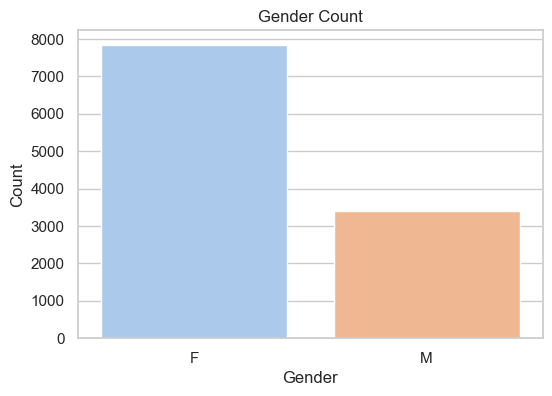

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Q10. Plot a bar chart for gender vs total amount 

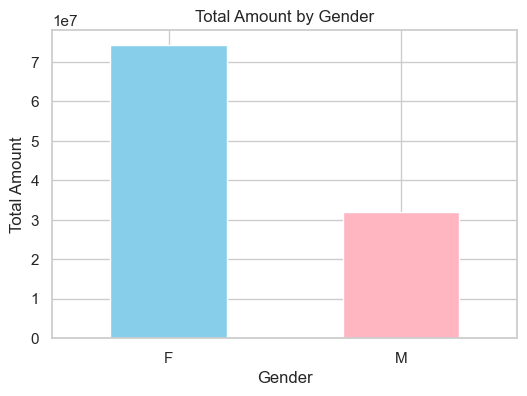

In [17]:
gender_amount = df.groupby('Gender')['Amount'].sum()

# Plot bar chart
gender_amount.plot(kind='bar', color=['skyblue', 'lightpink'], figsize=(6,4))

plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()


## Q11. Plot the countplot for Age Group with hue and Gender

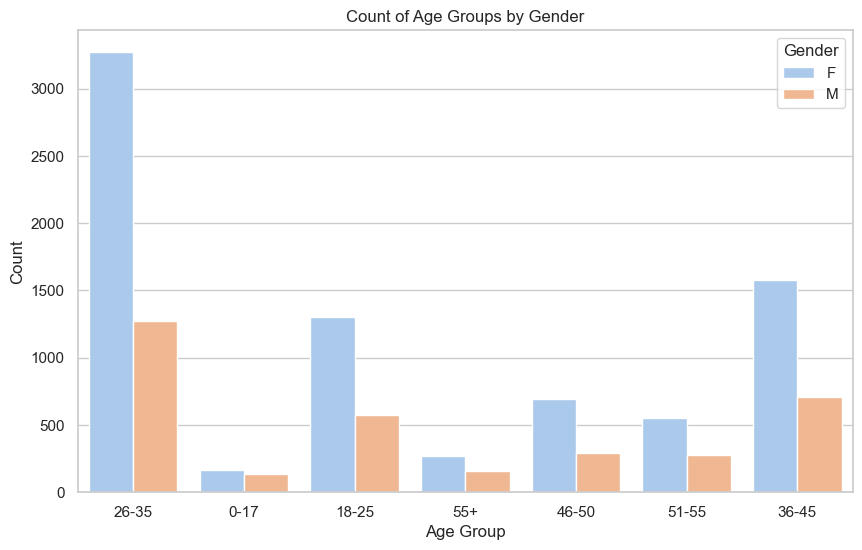

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age Group', hue='Gender', palette='pastel')

plt.title('Count of Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()



## Q12. Draw the plot for total number of orders from top 10 states 

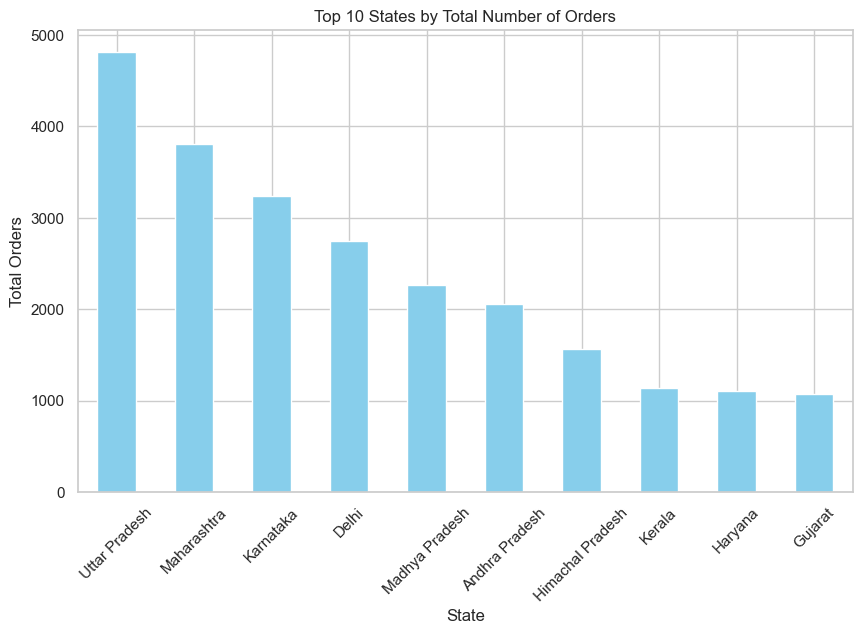

In [19]:
state_orders = df.groupby('State')['Orders'].sum()
top_10_states = state_orders.sort_values(ascending=False).head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_10_states.plot(kind='bar', color='skyblue')

plt.title('Top 10 States by Total Number of Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


## Q13.Draw the plot to plot total amount/sales from top 10 states

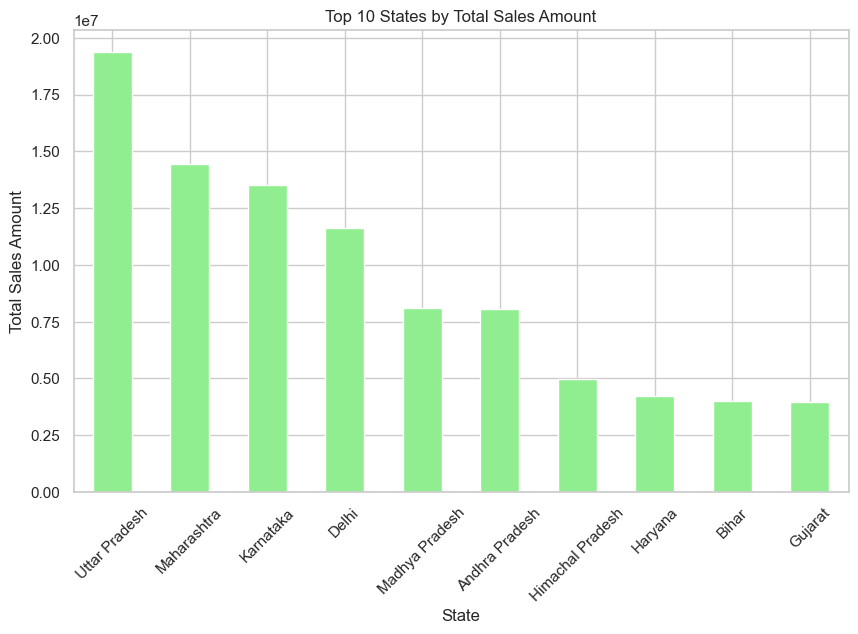

In [20]:
state_sales = df.groupby('State')['Amount'].sum() 
top_10_states_sales = state_sales.sort_values(ascending=False).head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_10_states_sales.plot(kind='bar', color='lightgreen')

plt.title('Top 10 States by Total Sales Amount')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


## Q14. Draw the plot to show the marital status 

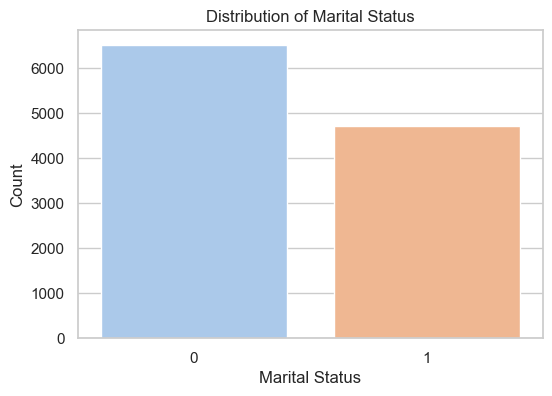

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status', palette='pastel')

plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


## Q15. Draw the plot to show the top 10 occuoations

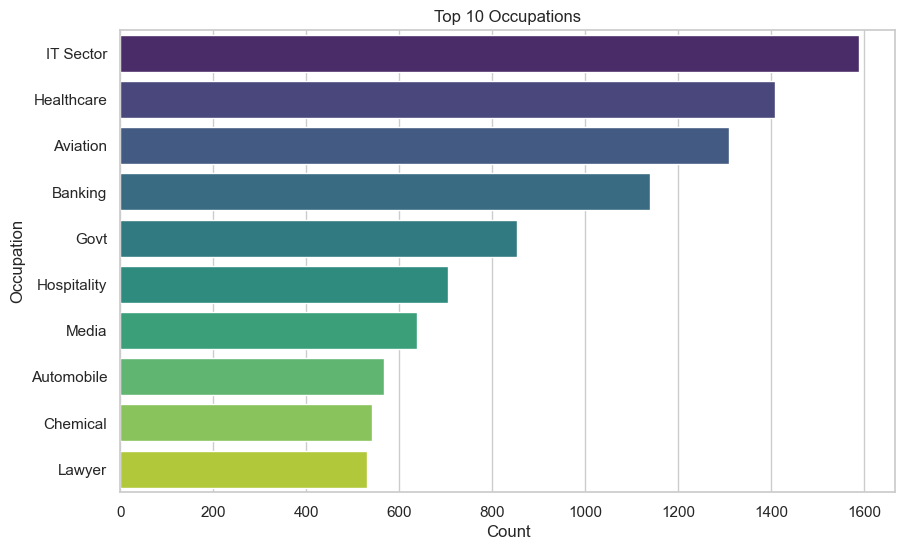

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


top_10_occupations = df['Occupation'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_occupations.values, y=top_10_occupations.index, palette='viridis')

plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


## Q16. Draw the countplot to print the top 10 categories 

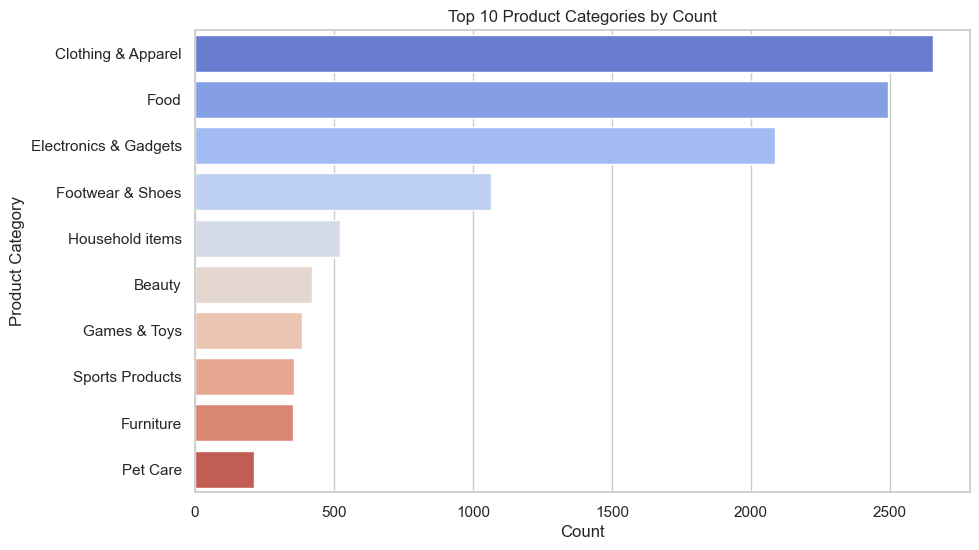

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


top_10_categories = df['Product_Category'].value_counts().nlargest(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df[df['Product_Category'].isin(top_10_categories)], 
              y='Product_Category', 
              order=top_10_categories,
              palette='coolwarm')

plt.title('Top 10 Product Categories by Count')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


## Q17. What is the prodct ID of the top 10 most sold products.

In [29]:

top_products = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head(10)

print(top_products)


Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00114942     79
P00025442     79
P00145042     76
P00117942     76
P00044442     75
P00110842     74
Name: Orders, dtype: int64


## Q18. What conclusion you can draw from the above visualizations. 

In [ ]:
The charts reveal who the customers are, where they live, and what they like, helping the company sell more effectively.
